# Reward Training Analysis - Tone novelty

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from rt_extension import Reward_Training
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# NAc
nac_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc"
# nac_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc"

# nac_experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/Reward Training/Reward Training/Reward_Training/Day1/NAc"
# nac_experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/Reward Training/Reward Training/Reward_Training/Day10/NAc"
nac_color = '#15616F'

# mPFC
mpfc_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC"
# mpfc_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC"

# mpfc_experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/Reward Training/Reward Training/Reward_Training/Day1/mPFC"
# mpfc_experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/Reward Training/Reward Training/Reward_Training/Day10/mPFC"
mpfc_color = '#FFAF00'

# NAc: #15616F
# mPFC: #FFAF00
save_path = r'graphs'
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\test"


In [3]:
nac_exp = Reward_Training(experiment_folder_path=nac_experiment_path, behavior_folder_path=None)
mpfc_exp = Reward_Training(experiment_folder_path=mpfc_experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc\n5-240901-064209\Notes.txt
read from t=0s to t=1681.56s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc\n7-240901-115754\Notes.txt
read from t=0s to t=2008.26s
read from t=0s to t=3853.69s
read from t=0s to t=3853.69s
read from t=0s to t=3851.09s
read from t=0s to t=3851.09s
read from t=0s to t=3863.41s
read from t=0s to t=3863.41s
read from t=0s to t=3846.39s
read from t=0s to t=3846.39s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC\p1-240529-061914\Notes.txt
read from t=0s to t=1680.98s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC\p2-240529-091204\Notes.txt
read from t=0s to t=1682.24s
Fo

In [4]:
def run_rtc_pipeline(exp, experiment_path):
    exp.rtc_processing()
    exp.create_base_df(experiment_path)
    exp.remove_specified_subjects()
    exp.extract_da_columns()
    exp.find_first_port_entry_after_sound_cue()
    # exp.compute_closest_port_offset(
    #     PE_column='first_PE_after_sound_cue',
    #     offset_column='filtered_port_entry_offset'
    # )

    # Choose either standard or EI DA
    # exp.compute_standard_DA()  # for all tones, calculate the standard DA response (-4s ->10s) for both tone and lick
    exp.compute_EI_DA()  # for all tones, calculate the event-induced DA response (-4s ->10s) for both tone and lick

    exp.compute_rtc_da_metrics()

run_rtc_pipeline(nac_exp, experiment_path=nac_experiment_path)
run_rtc_pipeline(mpfc_exp, experiment_path=mpfc_experiment_path)

Processing trial n5-240901-064209...
Processing trial n7-240901-115754...
Processing trial nn1-250124-052535...
Processing trial nn2-250124-052535...
Processing trial nn3-250124-064620...
Processing trial nn4-250124-064620...
Processing trial nn5-250124-111148...
Processing trial nn6-250124-111148...
Processing trial nn7-250124-122758...
Processing trial nn8-250124-122758...
Processing trial p1-240529-061914...
Processing trial p2-240529-091204...
Processing trial p3-240529-115040...
Processing trial p4-240529-142834...
Processing trial p5-240901-052302...
Processing trial p6-240901-080800...
Processing trial p7-240901-104150...
Processing trial p8-240901-131350...
Processing trial pp1-250124-083014...
Processing trial pp2-250124-083014...
Processing trial pp3-250124-095442...
Processing trial pp4-250124-095442...
Processing trial pp5-250124-134955...
Processing trial pp6-250124-134955...
Processing trial pp7-250124-150609...
Processing trial pp8-250124-150609...


In [5]:
print(nac_exp.da_df['Tone AUC'].apply(lambda x: len(x) if isinstance(x, list) else 0))


0    16
1    20
2    60
3    60
4    39
5    39
6    39
7    39
8    39
9    39
Name: Tone AUC, dtype: int64


### Tone AUC DA Across Trials - Linear

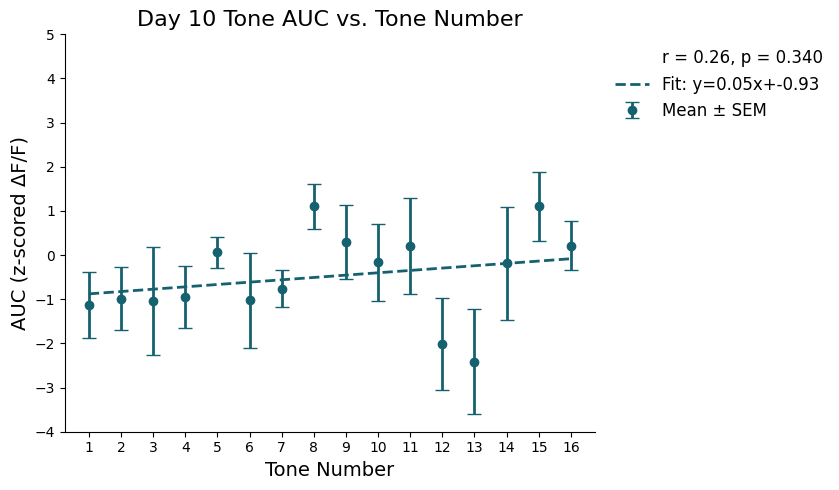

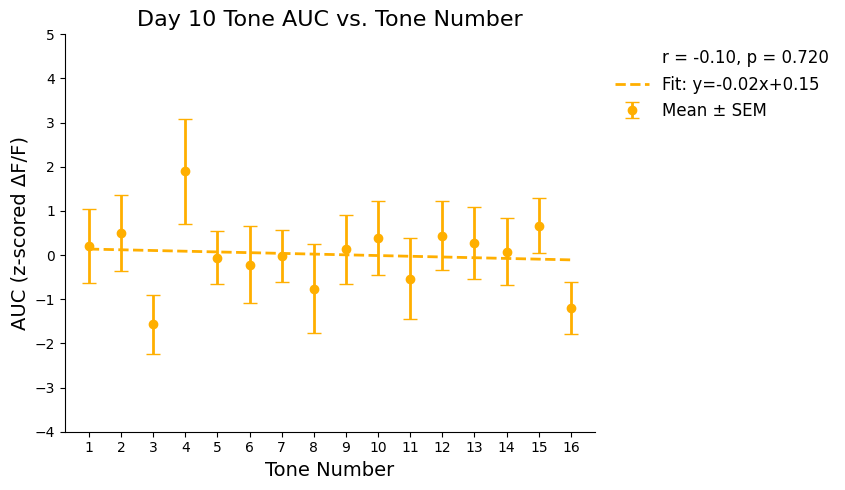

In [6]:
nac_exp.plot_scatter('Tone AUC',
                      color= nac_color,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='AUC (z-scored ΔF/F)',
                      title='Day 10 Tone AUC vs. Tone Number'
                      ,yrange=(-4,5))

mpfc_exp.plot_scatter('Tone AUC',
                      color= mpfc_color,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='AUC (z-scored ΔF/F)',
                      title='Day 10 Tone AUC vs. Tone Number'
                      ,yrange=(-4,5))

# exp.plot_sequential_event('Tone AUC',
#                       color= brain_region,
#                       individual_dots=True,
#                       xlabel='Tone Number',
#                       ylabel='AUC (z-scored ΔF/F)',
#                       title='Day 10 Tone AUC vs. Tone Number',
#                       yrange=(-4,7))


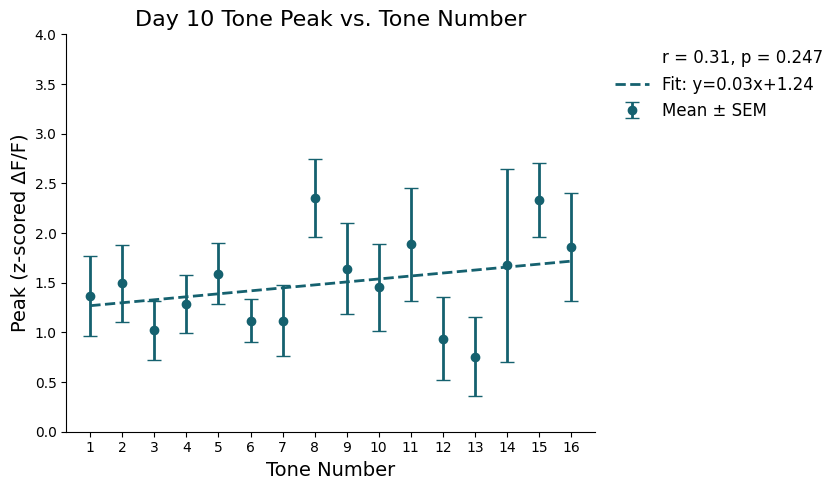

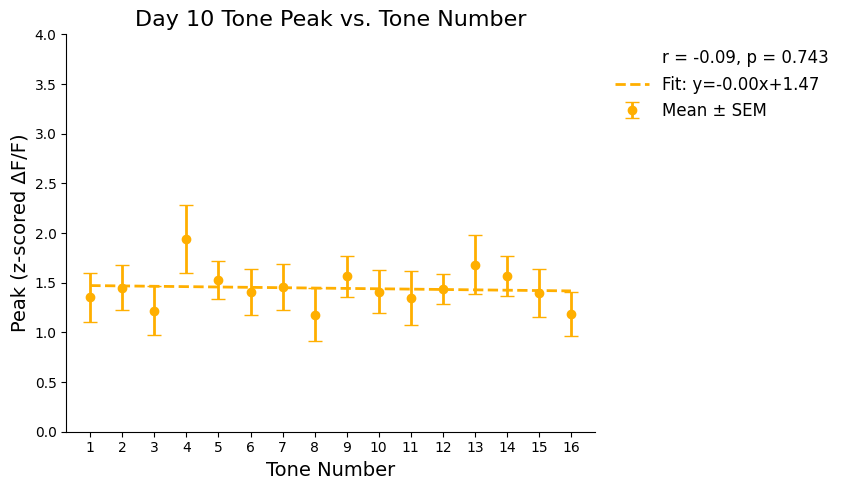

In [7]:
nac_exp.plot_scatter('Tone Max Peak',
                      color= nac_color,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='Peak (z-scored ΔF/F)',
                      title='Day 10 Tone Peak vs. Tone Number'
                      ,yrange=(0,4))


mpfc_exp.plot_scatter('Tone Max Peak',
                      color= mpfc_color,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='Peak (z-scored ΔF/F)',
                      title='Day 10 Tone Peak vs. Tone Number'
                      ,yrange=(0,4))


# exp.plot_sequential_event('Tone Max Peak',
#                       color= brain_region,
#                       individual_dots=True,
#                       xlabel='Tone Number',
#                       ylabel='Peak (z-scored ΔF/F)',
#                       title='Day 10 Tone Peak vs. Tone Number')


### 1st Port Entry 

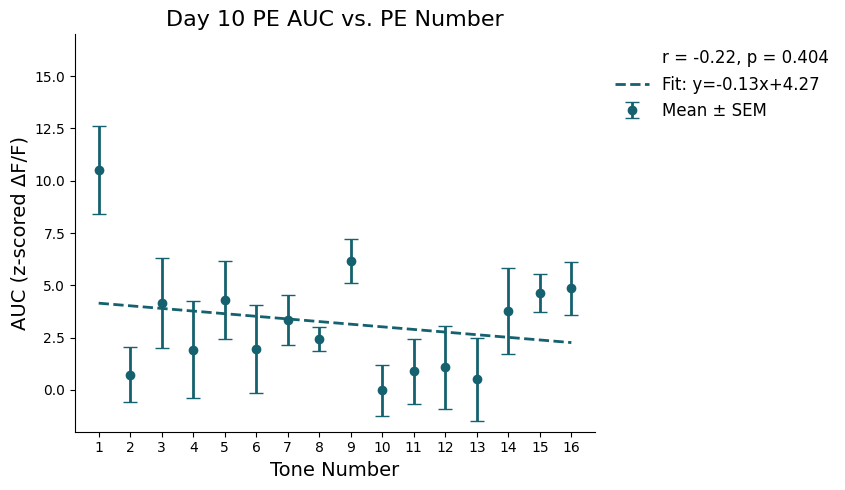

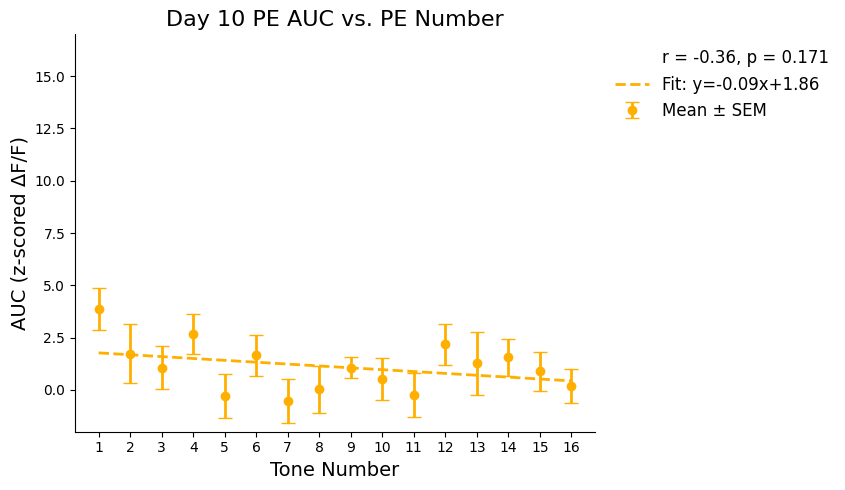

In [8]:
nac_exp.plot_scatter('PE AUC',
                      color= nac_color,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='AUC (z-scored ΔF/F)',
                      title='Day 10 PE AUC vs. PE Number'
                      ,yrange=(-2,17))


mpfc_exp.plot_scatter('PE AUC',
                      color= mpfc_color,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='AUC (z-scored ΔF/F)',
                      title='Day 10 PE AUC vs. PE Number'
                      ,yrange=(-2,17))

# exp.plot_sequential_event('Tone AUC',
#                       color= brain_region,
#                       individual_dots=True,
#                       xlabel='Tone Number',
#                       ylabel='AUC (z-scored ΔF/F)',
#                       title='Day 10 Tone AUC vs. Tone Number',
#                       yrange=(-4,7))


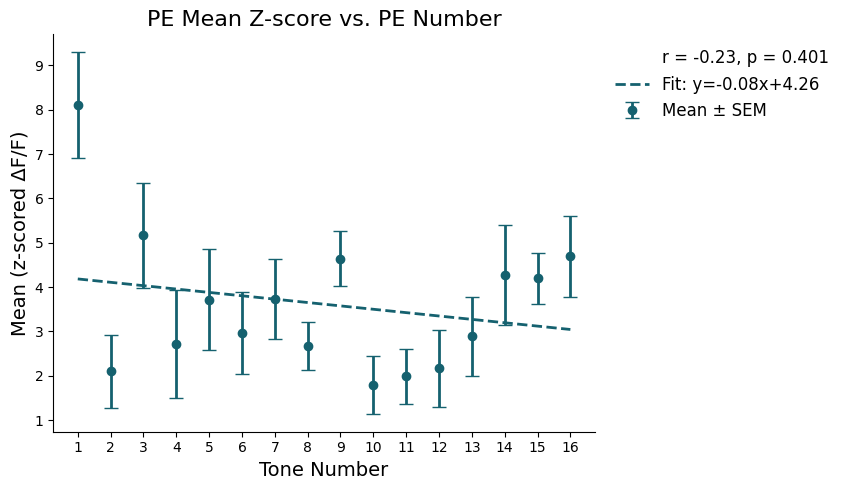

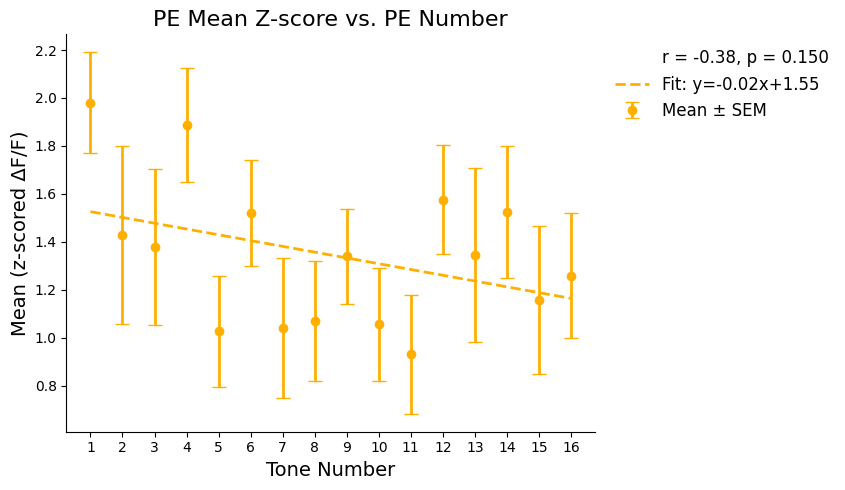

In [9]:
nac_exp.plot_scatter('PE Max Peak',
                      color= nac_color,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='Mean (z-scored ΔF/F)',
                      title='PE Mean Z-score vs. PE Number')
                    #   ,yrange=(-2.5,2.5))


mpfc_exp.plot_scatter('PE Max Peak',
                      color= mpfc_color,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='Mean (z-scored ΔF/F)',
                      title='PE Mean Z-score vs. PE Number')


Make sure that if there is a difference between cohorst in the number of tones that are made, it only calculates it based on the lowest amount. 